<a href="https://colab.research.google.com/github/swapnanilsharma/temp/blob/main/Business_Case_Netflix_Data_Exploration_and_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

**Reading the data and basic understanding of the data**

In [3]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv")

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Problem Statement

We are having a Netflix dataset containing details of Movies and TV Shows.

**Show_id**: Unique ID for every Movie / Tv Show

**Type**: Identifier - A Movie or TV Show

**Title**: Title of the Movie / Tv Show

**Director**: Director of the Movie

**Cast**: Actors involved in the movie/show

**Country**: Country where the movie/show was produced

**Date_added**: Date it was added on Netflix

**Release_year**: Actual Release year of the movie/show

**Rating**: TV Rating of the movie/show

**Duration**: Total Duration - in minutes or number of seasons

**Listed_in**: Genre

**Description**: The summary description

Based on the data, we need to find insights by exploratory data analysis, recommend Nexflix on their strong area. How they can build/onboard a show such that they revenue will increase.

In [5]:
# Spilt the dataset based on movie and TV show
df_movie = df[df["type"] == "Movie"]
df_movie["duration_min"] = df_movie["duration"].str.split().str[0]
df_movie.head()

<ipython-input-5-6ddfebf7b724>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie["duration_min"] = df_movie["duration"].str.split().str[0]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_min
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127


In [6]:
len(df) # Total 8807 numbers of movie and TV shows present in the dataset

8807

In [7]:
df.dtypes # Checking datatype of the columns

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [8]:
df.isnull().sum() # Checking for missing values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
df[df[["duration"]].isnull().any(axis=1)]
# It seems duration and rating is misplaced here. So making rating as duration for these 3 movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [10]:
# Data impute for missing "duration" column
s_ids = df[df[["duration"]].isnull().any(axis=1)]["show_id"].tolist()
for s_id in s_ids:
    df.loc[df["show_id"] == s_id, "duration"] = df.loc[df["show_id"] == s_id, "rating"]

In [11]:
df[df[["rating"]].isnull().any(axis=1)] 
# It is not a good idea to impute the rating based on provided information. Also 4 out of 8807 records have missing rating.
# We can ignore these records

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [12]:
df = df[df['rating'].notna()] # droping rows which has missing "rating"

In [13]:
df[df[["date_added"]].isnull().any(axis=1)] 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [14]:
df_temp = df[df['date_added'].notna()]
df_temp = df_temp[df_temp["release_year"] >= 2003]
(df_temp["date_added"].str.split().str[-1].astype(int) - df_temp["release_year"]).value_counts()
# Maximum movies/TV shows which are released after 2003 are added in netflix on the same year itself. 
# Rest are added next year

 0     3240
 1     1585
 2      713
 3      489
 4      367
 5      261
 6      251
 7      187
 8      185
 9      161
 10     135
 11     134
 12      98
 13      97
 14      74
 15      54
 16      49
 17      23
 18      18
-1       12
-2        1
-3        1
dtype: int64

In [15]:
df_temp = df[df["date_added"].notnull()]
df_temp["date_added"].str.split(",").str[0].mode() # Maximum movies are added into the netflix on January 1. 
# Based on these 2 analysis, we are adding Jan 1 of next year as date_added for missing values

0    January 1
dtype: object

In [16]:
# Data impute for missing "date_added" column
s_ids = df[df[["date_added"]].isnull().any(axis=1)]["show_id"].tolist()
for s_id in s_ids:
    df.loc[df["show_id"] == s_id, "date_added"] = "January 1," + str(df.loc[df["show_id"] == s_id, "release_year"].values[0]+1)

In [17]:
df.isnull().sum() # Checking for missing values. All Good Now. For director, cast and country we will impute later

show_id            0
type               0
title              0
director        2631
cast             825
country          830
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [18]:
# Checking for unique values for all the columns
for i in df.columns:
  print(f"{i}: {df[i].nunique()}")

show_id: 8803
type: 2
title: 8803
director: 4527
cast: 7689
country: 748
date_added: 1774
release_year: 74
rating: 17
duration: 220
listed_in: 514
description: 8771


In [19]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


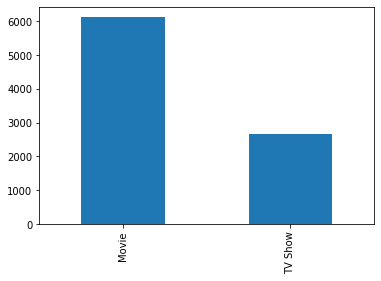

In [20]:
df["type"].value_counts().plot(kind = 'bar') # More movies are released on netflix as comppared to TV Shows

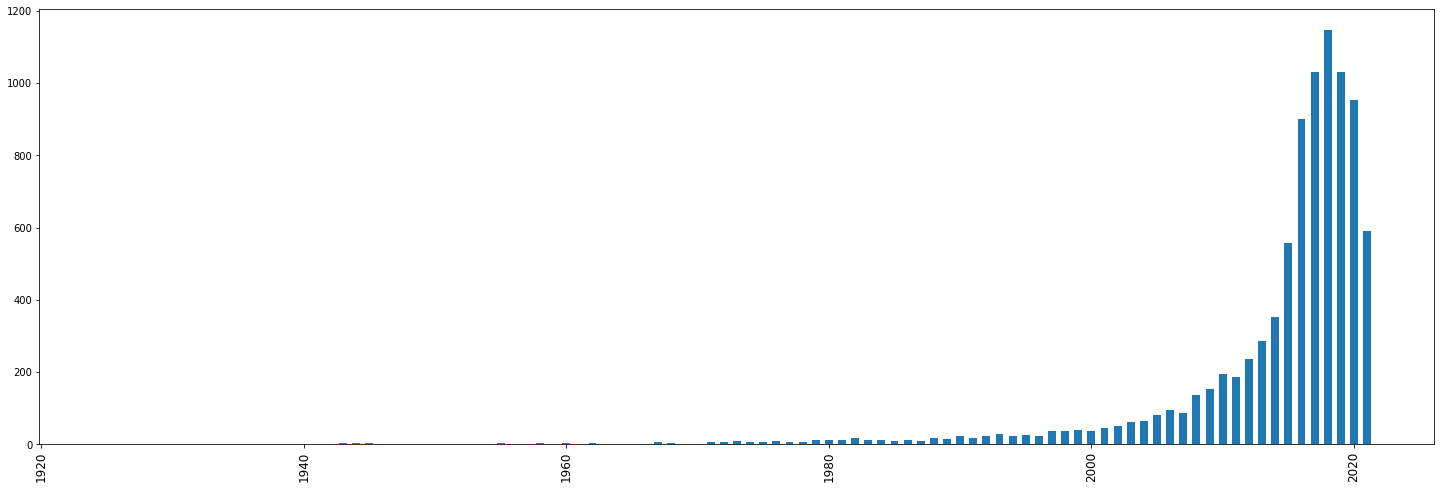

In [21]:
release_year_cnt = df["release_year"].value_counts()
x_bar=release_year_cnt.index
y_bar=release_year_cnt
plt.figure(figsize=(25,8))
plt.bar(x_bar,y_bar,width=0.6)
plt.xticks(rotation = 90, fontsize=12)
plt.show()

# More contents were released uptil 2018, after that the count is decreasing 

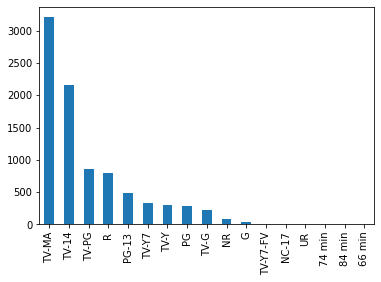

In [22]:
df["rating"].value_counts().plot(kind = 'bar') # More contents are on TV-MA(Mature Audience Only) and TV-14(Under 14)

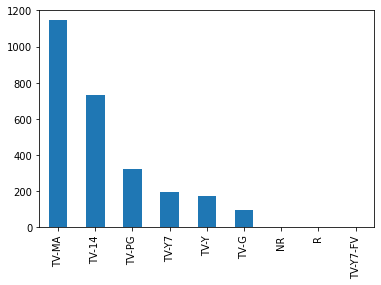

In [23]:
df[df['type'] == 'TV Show']["rating"].value_counts().plot(kind = 'bar') 
# More TV Shows are on TV-MA(Mature Audience Only) and TV-14(Under 14)

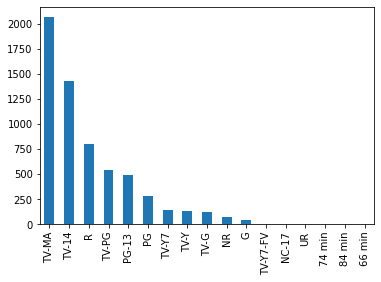

In [24]:
df[df['type'] == 'Movie']["rating"].value_counts().plot(kind = 'bar')
# More Movies are on TV-MA(Mature Audience Only) and TV-14(Under 14)

In [25]:
df["duration"] = df["duration"].str.split().str[0] # Converting duration to #no of mins and #no of seasons

In [26]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [27]:
mx = max(df[df['type'] == "TV Show"]['duration'].astype(int).tolist())
mn = min(df[df['type'] == "TV Show"]['duration'].astype(int).tolist())
print(f"Min TV Show Seasons: {mn}, Max TV Show Seasons: {mx}")

mx = max(df[df['type'] == "Movie"]['duration'].astype(int).tolist())
mn = min(df[df['type'] == "Movie"]['duration'].astype(int).tolist())
print(f"Min Movie length: {mn} minutes, Max Movie Length: {mx} minutes")

Min TV Show Seasons: 1, Max TV Show Seasons: 17
Min Movie length: 3 minutes, Max Movie Length: 312 minutes


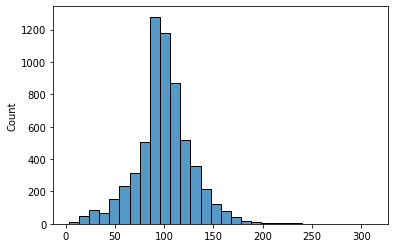

In [28]:
sns.histplot(df[df["type"]=="Movie"]['duration'].astype(int).tolist(), bins=30)
plt.show()
# Movies with 80-100 mins of duration are present

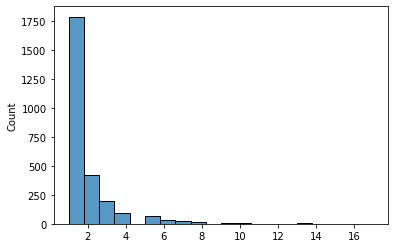

In [29]:
sns.histplot(df[df["type"]=="TV Show"]['duration'].astype(int).tolist(), bins=20)
plt.show()
# TV Shows with 1-2 Seasons are present

In [130]:
d_movie = df[(df['type'] == 'Movie') & (df["rating"].isin(["TV-MA", "TV-14"])) & (df["duration"].astype(int).between(80,100))]
d_series = df[(df['type'] == 'TV Show') & (df["rating"].isin(["TV-MA", "TV-14"])) & (df["duration"].astype(int).between(1,2))]

**Spliting Directors, Actors, Country and listed_in**

In [131]:
df_old = df

### Top Director/Actor/Genre for Movies based on popular duration and rating

In [152]:
def combine_df(df):
  # Split the director columns into multiple records for each title
  constraint1 = df["director"].apply(lambda x: str(x).split(",")).tolist()
  df_new1 = pd.DataFrame(constraint1, index=df["title"])
  df_new1=df_new1.stack()
  df_new1=pd.DataFrame(df_new1.reset_index())
  df_new1.rename(columns={0: "Directors"}, inplace=True)
  df_new1.drop(["level_1"], axis=1, inplace=True)
  df_new1["Directors"].replace(['nan'], ['Unknown Director'], inplace=True)
  # df_new1.head()
  # Split the cast columns into multiple records for each title
  constraint2 = df["cast"].apply(lambda x: str(x).split(",")).tolist()
  df_new2 = pd.DataFrame(constraint2, index=df["title"])
  df_new2=df_new2.stack()
  df_new2=pd.DataFrame(df_new2.reset_index())
  df_new2.rename(columns={0: "Actors"}, inplace=True)
  df_new2.drop(["level_1"], axis=1, inplace=True)
  df_new2["Actors"].replace(['nan'], ['Unknown Actor'], inplace=True)
  # df_new2.head()
  # Split the country columns into multiple records for each title
  constraint3 = df["country"].apply(lambda x: str(x).split(",")).tolist()
  df_new3 = pd.DataFrame(constraint3, index=df["title"])
  df_new3=df_new3.stack()
  df_new3=pd.DataFrame(df_new3.reset_index())
  df_new3.rename(columns={0: "Country"}, inplace=True)
  df_new3.drop(["level_1"], axis=1, inplace=True)
  df_new3["Country"].replace(['nan'], [np.nan], inplace=True)
  # df_new3.head()
  # Split the listed_in columns into multiple records for each title
  constraint4 = df["listed_in"].apply(lambda x: str(x).split(",")).tolist()
  df_new4 = pd.DataFrame(constraint4, index=df["title"])
  df_new4=df_new4.stack()
  df_new4=pd.DataFrame(df_new4.reset_index())
  df_new4.rename(columns={0: "Listed_in"}, inplace=True)
  df_new4.drop(["level_1"], axis=1, inplace=True)
  # df_new4.head()
  df_new5=df_new2.merge(df_new1, on=['title'], how='inner')
  df_new6=df_new5.merge(df_new3, on=['title'], how='inner')
  df_new= df_new6.merge(df_new4, on=['title'], how='inner')
  # df_new.head()
  return df_new1, df_new2, df_new3, df_new4, df_new

### Movies

In [223]:
df = d_movie
d_director, d_actor, d_country, d_listed_in, d_final = combine_df(df)

In [188]:
d_final.shape

(24643, 5)

In [201]:
d_actor["Actors"].value_counts()
# Most of the movies are not mentioned with actors. 
# Among the mentioned actors, Hassan Abdulfattah, Hassan Hosny and Femi Adebayo are the most acted actor

Unknown Actor          153
 Hassan Abdulfattah      6
 Hassan Hosny            6
 Femi Adebayo            5
Scott Adkins             5
                      ... 
 Jorge Cabrera           1
 Carolina Clemente       1
 Mamen Duch              1
 Javier Cifrián          1
 Ahd                     1
Name: Actors, Length: 7250, dtype: int64

In [159]:
d_director["Directors"].value_counts()
# Most of the movies are not mentioned with directors. 
# Among the mentioned directors, Fernando Ayllón, Toshiya Shinohara and Chris Stokes are the most directed director

Unknown Director          27
Fernando Ayllón            6
Toshiya Shinohara          4
Chris Stokes               4
Jesse V. Johnson           4
                          ..
Abby Epstein               1
Aditya Vikram Sengupta     1
Stefon Bristol             1
Sam Cullman                1
Majid Al Ansari            1
Name: Directors, Length: 1251, dtype: int64

In [160]:
d_country["Country"].value_counts()
# Most of the contetnts are produced in United State, United Kingdom or India 

United States     443
United Kingdom     80
India              79
France             61
 United States     54
                 ... 
Bangladesh          1
Cambodia            1
 Romania            1
 Ukraine            1
 Austria            1
Name: Country, Length: 123, dtype: int64

In [163]:
d_listed_in["Listed_in"].value_counts()
# Most of the contetnts are either listed as International Movies, Dramas or Comedies

 International Movies       636
Dramas                      336
Comedies                    302
Documentaries               284
 Independent Movies         223
 Thrillers                  130
 Dramas                     118
Action & Adventure          113
 Romantic Movies            105
Horror Movies                99
 Music & Musicals            70
 Sports Movies               57
 Sci-Fi & Fantasy            40
 LGBTQ Movies                39
Stand-Up Comedy              36
International Movies         32
 Comedies                    30
Thrillers                    27
 Horror Movies               13
 Anime Features              12
Children & Family Movies      8
Independent Movies            6
 Documentaries                5
Classic Movies                5
 Faith & Spirituality         5
 Cult Movies                  4
Sci-Fi & Fantasy              3
Music & Musicals              2
Movies                        2
Romantic Movies               2
 Stand-Up Comedy              1
Name: Li

In [224]:
d_final[d_final["Directors"].isin(["Fernando Ayllón", "Toshiya Shinohara",  "Chris Stokes"])]

,title,Actors,Directors,Country,Listed_in
10,InuYasha the Movie 2: The Castle Beyond the Lo...,Kappei Yamaguchi,Toshiya Shinohara,Japan,Action & Adventure
11,InuYasha the Movie 2: The Castle Beyond the Lo...,Kappei Yamaguchi,Toshiya Shinohara,Japan,Anime Features
12,InuYasha the Movie 2: The Castle Beyond the Lo...,Kappei Yamaguchi,Toshiya Shinohara,Japan,International Movies
13,InuYasha the Movie 2: The Castle Beyond the Lo...,Satsuki Yukino,Toshiya Shinohara,Japan,Action & Adventure
14,InuYasha the Movie 2: The Castle Beyond the Lo...,Satsuki Yukino,Toshiya Shinohara,Japan,Anime Features
...,...,...,...,...,...
24134,We Belong Together,Cassidey Fralin,Chris Stokes,United States,Thrillers
24135,We Belong Together,Brian White,Chris Stokes,United States,Thrillers
24136,We Belong Together,Valarie Pettiford,Chris Stokes,United States,Thrillers
24137,We Belong Together,Gary Anthony Sturgis,Chris Stokes,United States,Thrillers


In [217]:
d_final[d_final["Actors"].isin([" Hassan Abdulfattah", " Hassan Hosny", " Femi Adebayo"])]

,title,Actors,Directors,Country,Listed_in
493,Unroyal,Femi Adebayo,Moses Inwang,NaN,Dramas
494,Unroyal,Femi Adebayo,Moses Inwang,NaN,International Movies
3626,Mohamed Hussein,Hassan Abdulfattah,Muhammad Ali,Egypt,Comedies
3627,Mohamed Hussein,Hassan Abdulfattah,Muhammad Ali,Egypt,International Movies
3848,The Suit,Hassan Hosny,Mohammad Adel,Egypt,Action & Adventure
3849,The Suit,Hassan Hosny,Mohammad Adel,Egypt,Comedies
3850,The Suit,Hassan Hosny,Mohammad Adel,Egypt,International Movies
4488,El-Khawaga's Dilemma,Hassan Hosny,Peter Mimi,Egypt,Action & Adventure
4489,El-Khawaga's Dilemma,Hassan Hosny,Peter Mimi,Egypt,Comedies
4490,El-Khawaga's Dilemma,Hassan Hosny,Peter Mimi,Egypt,International Movies


In [208]:
d_final[d_final["Country"].isin(["United States", "United Kingdom", "India"])]

,title,Actors,Directors,Country,Listed_in
188,If I Leave Here Tomorrow: A Film About Lynyrd ...,Ronnie Van Zandt,Stephen Kijak,United States,Documentaries
189,If I Leave Here Tomorrow: A Film About Lynyrd ...,Ronnie Van Zandt,Stephen Kijak,United States,Music & Musicals
190,If I Leave Here Tomorrow: A Film About Lynyrd ...,Gary Rossington,Stephen Kijak,United States,Documentaries
191,If I Leave Here Tomorrow: A Film About Lynyrd ...,Gary Rossington,Stephen Kijak,United States,Music & Musicals
192,If I Leave Here Tomorrow: A Film About Lynyrd ...,Allen Collins,Stephen Kijak,United States,Documentaries
...,...,...,...,...,...
24446,Would You Rather,Robin Lord Taylor,David Guy Levy,United States,Independent Movies
24447,Would You Rather,Robin Lord Taylor,David Guy Levy,United States,Thrillers
24448,Would You Rather,Robb Wells,David Guy Levy,United States,Horror Movies
24449,Would You Rather,Robb Wells,David Guy Levy,United States,Independent Movies


In [213]:
d_final[d_final["Listed_in"].isin(["International Movies", "Dramas", "Comedies"])]

,title,Actors,Directors,Country,Listed_in
106,Prey,David Kross,Thomas Sieben,NaN,International Movies
108,Prey,Hanno Koffler,Thomas Sieben,NaN,International Movies
110,Prey,Maria Ehrich,Thomas Sieben,NaN,International Movies
112,Prey,Robert Finster,Thomas Sieben,NaN,International Movies
114,Prey,Yung Ngo,Thomas Sieben,NaN,International Movies
...,...,...,...,...,...
24628,Zinzana,Ali Al-Jabri,Majid Al Ansari,Jordan,Dramas
24631,Zinzana,Mansoor Alfeeli,Majid Al Ansari,United Arab Emirates,Dramas
24634,Zinzana,Mansoor Alfeeli,Majid Al Ansari,Jordan,Dramas
24637,Zinzana,Ahd,Majid Al Ansari,United Arab Emirates,Dramas


In [61]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### TV Shows

In [225]:
df = d_series
d_director, d_actor, d_country, d_listed_in, d_final = combine_df(df)

In [219]:
d_final.shape

(35761, 5)

In [220]:
d_actor["Actors"].value_counts()
# Most of the TV Shows are not mentioned with actors. 
# Among the mentioned actors, Takahiro Sakurai, Junichi Suwabe and Ai Kayano are the most acted actor

Unknown Actor        218
 Takahiro Sakurai     21
 Junichi Suwabe       15
 Ai Kayano            14
 Yuki Kaji            14
                    ... 
Joseph Chang           1
 Denden                1
 Sei Matobu            1
 Chiho Fujii           1
 Mehmet Esen           1
Name: Actors, Length: 9877, dtype: int64

In [221]:
d_director["Directors"].value_counts()
# Most of the TV Shows are not mentioned with directors. 
# Among the mentioned actors, Hsu Fu-chun, Ken Burns and Joe Berlinger are the most directed director

Unknown Director          1403
Hsu Fu-chun                  2
Ken Burns                    2
Joe Berlinger                2
 Gautham Vasudev Menon       2
                          ... 
Ellena Wood                  1
 Jesse Vile                  1
Lai Chun-yu                  1
Jalil Lespert                1
 Lynn Novick                 1
Name: Directors, Length: 235, dtype: int64

In [226]:
d_country["Country"].value_counts()
# Most of the TV Shows are produced in United State, South Korea or Japan 

United States     383
South Korea       133
Japan             119
United Kingdom    113
Taiwan             62
                 ... 
Puerto Rico         1
Finland             1
 Indonesia          1
Senegal             1
Switzerland         1
Name: Country, Length: 91, dtype: int64

In [227]:
d_listed_in["Listed_in"].value_counts()
# Most of the TV Shows are either listed as International TV Shows, TV Dramas or Crime TV Shows

International TV Shows           631
 TV Dramas                       531
 International TV Shows          442
Crime TV Shows                   332
 Romantic TV Shows               275
 TV Comedies                     253
 Spanish-Language TV Shows       135
Docuseries                       127
 Docuseries                      121
British TV Shows                 119
Anime Series                     114
 Korean TV Shows                 110
 Reality TV                       81
 TV Action & Adventure            76
 TV Mysteries                     69
TV Comedies                       63
Reality TV                        60
 Crime TV Shows                   57
 TV Horror                        47
 TV Sci-Fi & Fantasy              41
 Teen TV Shows                    37
TV Dramas                         36
 TV Thrillers                     35
 Science & Nature TV              32
Stand-Up Comedy & Talk Shows      24
TV Action & Adventure             20
Romantic TV Shows                 19
 

# **Recommendations**


As there is no direct KPI related to the Netflix users mentioned here based on which we can recommend the best movies/genre/director etc. We are having only the content details here. So we have identified the most common identifiers as the KPI by default to analyse and recommendations. For eg, if Anupam Kher has the acted in most of the contents then he is liking by the Netflix users.

1. Netflix should create more TV Show which contains 1-2 Seasons.
2. Netflix should create more movies which is of length 80-100 mins.
3. Netflix should concentrate more on **TV-MA**(Mature Audience Only) and **TV-14**(Under 14) rated contents

### **For Movies:**

4. For **movies**, *Hassan Abdulfattah*, *Hassan Hosny* and *Femi Adebayo* are most acted actors, so if we create any content around them then chances are they got popular
5. Similarly for **movies**, *Fernando Ayllón*, *Toshiya Shinohara* and *Chris Stokes* has directed most of the movies.
6. Most of the **movies** are produced in *United State*, *United Kingdom* and *India* 
7. For **movies**, *International Movies*, *Dramas* or *Comedies* genre has the highest no of movies.
8. Combining point 4-7, if Netflix make any movies which is **acted by point#4 actors**, **directed by point#5 directors**, **produced in point#6 countries** and **genre of point#7**, chances are these movies will get popular. Also these movies has to of length **80-100 minutes** and of rating **TV-MA** or **TV-14**

### **For TV Shows:**

9. For **TV Shows**, *Takahiro Sakurai*, *Junichi Suwabe* and *Ai Kayano* are most acted actors, so if we create any content around them then chances are they got popular
10. Similarly for **TV Shows**, *Hsu Fu-chun*, *Ken Burns* and *Joe Berlinger* has directed most of the movies.
11. Most of the **TV Shows** are produced in *United State*, *South Korea* and *Japan* 
12. For **TV Shows**, *International TV Shows*, *TV Dramas* or *Crime TV Shows* genre has the highest no of movies.
13. Combining point 9-12, if Netflix make any TV Show which is **acted by point#9 actors**, **directed by point#10 directors**, **produced in point#11 countries** and **genre of point#12**, chances are these movies will get popular. Also these movies has to of length **1-2 Seasons** and of rating **TV-MA** or **TV-14**


